# Chapter 6

In [1]:
# copied from p1ch6/1_neural_networks

In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 4,  0, 10,  5,  2,  8,  3,  6,  1]), tensor([7, 9]))

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [6]:
import torch.nn as nn

In [7]:
nn.Linear?

Init signature: nn.Linear(in_features, out_features, bias=True)
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
      additional dimensions and :math:`H_{in} = \text{in\_features}`
    - Output: :math:`(N, *, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(\text{out\_features}, \text{in\_features})`. The values are
        initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
        :math:`k = \frac{1}{\text{in\_features}}`
    bias:   the learnable bias of the module of shape :math:`(\text{out\_featur

In [8]:
linear_model = nn.Linear(1,1) # 1 in and 1 out

In [10]:
linear_model(t_un_val) # this ends up calling .forward()

tensor([[2.5819],
        [5.5309]], grad_fn=<AddmmBackward>)

In [12]:
linear_model.forward(t_un_val) # this is technically correct but not recommended

tensor([[2.5819],
        [5.5309]], grad_fn=<AddmmBackward>)

In [13]:
linear_model.weight

Parameter containing:
tensor([[0.7640]], requires_grad=True)

In [14]:
linear_model.bias

Parameter containing:
tensor([0.9164], requires_grad=True)

In [15]:
x = torch.ones(1)
linear_model(x)

tensor([1.6804], grad_fn=<AddBackward0>)

In [16]:
x = torch.ones(10,1)

In [17]:
linear_model(x)

tensor([[1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804],
        [1.6804]], grad_fn=<AddmmBackward>)

In [18]:
linear_model = nn.Linear(1,1) 
optimizer = optim.SGD(linear_model.parameters(),
                     lr=1e-2)

In [20]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9901]], requires_grad=True),
 Parameter containing:
 tensor([0.3631], requires_grad=True)]

In [25]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    """
    """
    for epoch in range(1,n_epochs+1):
        # get predictions and loss on training
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_u_train)
        
        # validation
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_u_val)
        
        # make updates
        optimizer.zero_grad() # reset
        loss_train.backward() # calculate grad
        optimizer.step() # apply changes to parameters
        
        if epoch < 5 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
    return

In [26]:
def blank():
    ...

def blank_return():
    return
[blank(), blank_return()]

[None, None]

In [27]:
assert blank() == blank_return()

In [41]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [42]:
training_loop(
n_epochs=3000,
optimizer=optimizer,
model=linear_model,
loss_fn=nn.MSELoss(),
t_u_train=t_un_train,
t_u_val=t_un_val,
t_c_train=t_c_train,
t_c_val=t_c_val)

Epoch 1, Training loss 1.0957, Validation loss 0.7486
Epoch 2, Training loss 0.1378, Validation loss 0.1000
Epoch 3, Training loss 0.0178, Validation loss 0.0157
Epoch 4, Training loss 0.0027, Validation loss 0.0041
Epoch 1000, Training loss 0.0000, Validation loss 0.0001
Epoch 2000, Training loss 0.0000, Validation loss 0.0000
Epoch 3000, Training loss 0.0000, Validation loss 0.0000


In [43]:
linear_model.weight

Parameter containing:
tensor([[1.0004]], requires_grad=True)

In [44]:
linear_model.bias

Parameter containing:
tensor([-0.0023], requires_grad=True)

##### 6.3 Finally a Neural Network

In [53]:
seq_model = nn.Sequential(
nn.Linear(1,13), # linear model with 1. input and 13 out
nn.Tanh(), # activation
nn.Linear(13,1)) # 13 inputs to single output combined linearly 

In [46]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [47]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [69]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
n_epochs=5000,
optimizer=optimizer,
model=seq_model,
loss_fn=nn.MSELoss(),
t_u_train=t_un_train,
t_u_val=t_un_val,
t_c_train=t_c_train,
t_c_val=t_c_val)

Epoch 1, Training loss 0.0021, Validation loss 0.0027
Epoch 2, Training loss 0.0021, Validation loss 0.0027
Epoch 3, Training loss 0.0021, Validation loss 0.0027
Epoch 4, Training loss 0.0021, Validation loss 0.0027
Epoch 1000, Training loss 0.0021, Validation loss 0.0027
Epoch 2000, Training loss 0.0021, Validation loss 0.0027
Epoch 3000, Training loss 0.0021, Validation loss 0.0027
Epoch 4000, Training loss 0.0021, Validation loss 0.0027
Epoch 5000, Training loss 0.0021, Validation loss 0.0027


In [70]:
for name,param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


##### Visualizing the results

In [71]:
import matplotlib.pyplot as plt

In [72]:
t_range = torch.arange(20., 90.).unsqueeze(1)
#t_range

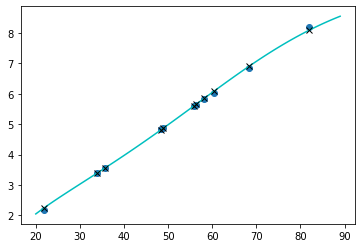

In [77]:
plt.plot(t_u.numpy(), 0.1*t_u.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1*t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(),'kx')